In [25]:
import matplotlib 
import pandas as pd
import re

In [2]:
import os
os.getcwd()

'/Users/2010y/opt/freelist'

In [3]:
df=pd.read_feather('program_l.feather')

In [4]:
df.shape

(55490, 9)

In [5]:
df['timezone']=df['date'].astype('str')
df['timezone']=df['timezone'].str.extract(r'(\s\D\d{4})')

<AxesSubplot:ylabel='timezone'>

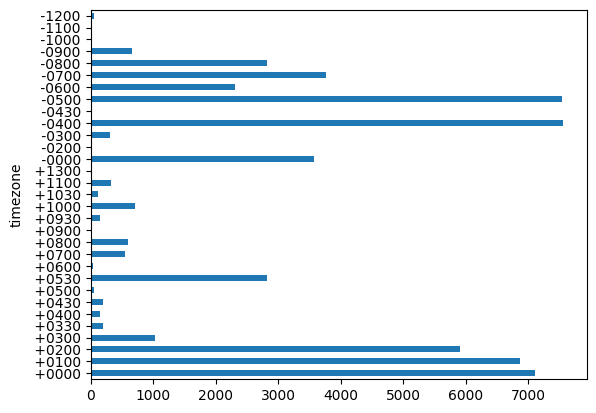

In [6]:
df.groupby(['timezone'])['body'].count().plot.barh()

In [7]:
df.groupby(['timezone'])['body'].count().sort_values(ascending=False)[0:10]

timezone
 -0400    7552
 -0500    7531
 +0000    7108
 +0100    6859
 +0200    5903
 -0700    3767
 -0000    3568
 +0530    2828
 -0800    2819
 -0600    2312
Name: body, dtype: int64

-0400: 7552 (Argentina, Brazil)
-0500: 7532 (Eastern Time Zone USA, Colombia, Peru)
+0000: 7108 (UK)
+0100: 6859 (Western Europe)
+0200: 5903 (Eastern Europe, Egypt, Libya, South Africa)
-0700: 3767 (Mountain Time Zone USA)
-0000: 3568 (UK?)
+0530: 2828 (India)
-0800: 2819 (Pacific Time Zone USA)
-0600: 2312 (Central Time Zone USA)

In [8]:
df['email']=df['from'].str.extract(r'(\<.*\>)')
df['email']=df['email'].str.lstrip('<')
df['email']=df['email'].str.rstrip('>')
df['email']=df['email'].str.lower()

In [9]:
df.groupby(['email'])['body'].count().sort_values(ascending=False)

email
sonfire11@xxxxxxxxx          2145
soronel.haetir@xxxxxxxxx     1965
james.homme@xxxxxxxxxxxx     1520
pranav.lal@xxxxxxxxx         1425
tyler@xxxxxxxxxxxxx          1308
                             ... 
mystaff02@xxxxxxxxx             1
sheylontum@xxxxxxxxx            1
gloomy_sushil@xxxxxxxxx         1
gkehret@xxxxxxxxxxxxxxxxx       1
zz78@xxxxxxxxxxxx               1
Name: body, Length: 854, dtype: int64

In [10]:
emaildf=df.groupby(['email', 'timezone'])['body'].count().sort_values(ascending=False).to_frame()

In [11]:
emaildf.reset_index(inplace=True)

In [12]:
emaildf[emaildf['email']=='james.homme@xxxxxxxxxxxx']#.count()[0]

,email,timezone,body
2,james.homme@xxxxxxxxxxxx,+0000,1418
139,james.homme@xxxxxxxxxxxx,-0400,83
409,james.homme@xxxxxxxxxxxx,-0500,18
1234,james.homme@xxxxxxxxxxxx,-0800,1


dmarc-noreply@xxxxxxxxxxxxx, dmarc-noreply-outsider@xxxxxxxxxxxxx

In [13]:
no_timezone={}
for email in emaildf['email'].unique():
    no_timezone[email]=emaildf[emaildf['email']==email].count()[0]

In [14]:
sorted(no_timezone.items(), key=lambda x: x[1], reverse=True)[0:10]

[('dmarc-noreply@xxxxxxxxxxxxx', 12),
 ('florianbeijers@xxxxxxxxx', 7),
 ('startrekcafe@xxxxxxxxx', 7),
 ('tyler@xxxxxxxxxxxxx', 6),
 ('taksantong@xxxxxxxxx', 6),
 ('stefika@xxxxxxxxx', 6),
 ('rodneyh@xxxxxxxxxx', 5),
 ('parham90@xxxxxxxxx', 5),
 ('luckycivic@xxxxxxxxx', 5),
 ('james.homme@xxxxxxxxxxxx', 4)]

dmarc-noreply traveled 12 timezones
but we have dmarc-noreply and dmar-noreply-ousider

In [15]:
df[df['email']=='dmarc-noreply-outsider@xxxxxxxxxxxxx']['from'].unique()

array(['"Mark Wilson-Thomas" <dmarc-noreply-outsider@xxxxxxxxxxxxx> (Redacted sender "Mark.Wilson-Thomas" for DMARC)',
       '"David Pugh" <dmarc-noreply-outsider@xxxxxxxxxxxxx> (Redacted sender "dpugh" for DMARC)'],
      dtype=object)

In [16]:
df[df['email']=='dmarc-noreply@xxxxxxxxxxxxx']['from'].unique()

array(['"Len Burns" <dmarc-noreply@xxxxxxxxxxxxx> (Redacted sender "len@xxxxxxxxxxxxx" for DMARC)',
       '"Auriche" <dmarc-noreply@xxxxxxxxxxxxx> (Redacted sender "dayugdog@xxxxxxxxx" for DMARC)',
       '"Bill Dennis" <dmarc-noreply@xxxxxxxxxxxxx> (Redacted sender "billiam904@xxxxxxxxx" for DMARC)',
       '"Chamandeep Singh Grover" <dmarc-noreply@xxxxxxxxxxxxx> (Redacted sender "cmusic789@xxxxxxxxxxxxxx" for DMARC)',
       '"Bryan Schulz" <dmarc-noreply@xxxxxxxxxxxxx> (Redacted sender "b.schulz@xxxxxxxxxxxxx" for DMARC)',
       '"Bryan Schulz" <dmarc-noreply@xxxxxxxxxxxxx> (Redacted sender "b.schulz" for DMARC)',
       '"Chamandeep Singh Grover" <dmarc-noreply@xxxxxxxxxxxxx> (Redacted sender "cmusic789" for DMARC)',
       '"Catie Baker" <dmarc-noreply@xxxxxxxxxxxxx> (Redacted sender "t-cabak" for DMARC)',
       '"Kevin Roberts" <dmarc-noreply@xxxxxxxxxxxxx> (Redacted sender "kcrpine" for DMARC)',
       '"Ian D. Nichols" <dmarc-noreply@xxxxxxxxxxxxx> (Redacted sender "inich" f

In [56]:
sample2.shape

(5, 11)

In [19]:
sample=df[df['email']=='dmarc-noreply@xxxxxxxxxxxxx']

In [55]:
sample2=df[df['email']=='dmarc-noreply-outsider@xxxxxxxxxxxxx']

In [57]:
sample=pd.concat([sample, sample2])

In [ ]:
redf=df.drop(sample.index)

In [76]:
sample['account']=sample['from'].str.extract(r'(\(.*\))')
sample['account']=sample['account'].str.lstrip('(Redacted sender ')
sample['account']=sample['account'].str.rstrip(' for DMARC)')
sample['account']=sample['account'].str.lstrip('"')
sample['account']=sample['account'].str.rstrip('"')
sample['account']=sample['account'].str.replace('\@.*', '', regex=True)

In [87]:
redf['account']=redf['from'].str.extract(r'(\<.*\>)')
redf['account']=redf['account'].str.lstrip('<')
redf['account']=redf['account'].str.replace('\@.*', '', regex=True)

In [89]:
redf.shape

(54211, 12)

In [90]:
sample.shape

(1279, 12)

In [94]:
sample['account'].unique()

array(['len', 'dayugdog', 'billiam904', 'cmusic789', 'b.schulz',
       't-cabak', 'kcrpine', 'inich', 'danteg', 'jjsturt', 'jwelsberry',
       'steven.hicks', 'sharkboy_torino', 'dominicn', 'amerrick',
       'rhr810', 'k_gunness', 'iz4apu', 'listes', 'andre', 'galiahmetov',
       'Isidor.Nikolic', 'lukasz.golonka', 'markalong64', 'jthomp',
       'wpg67', 'tieger_db', 'matt.campbell', 'taljazz', 'alinatwirpx',
       'James.Corbett', 'nicolas.vespoli', 'immigrant328', 'minor0403',
       'gmack', 'Mark.Wilson-Thomas', 'equalazi_chiqueval', 'gcarella',
       'hihohaia', 'mani.g.iyer', 'weavermicha', 'kb9ram', 'vperetokin',
       'codyt20', 'dpugh'], dtype=object)

In [95]:
redf['account'].unique()

array(['george', 'James.Corbett', 't.stockman', 'david.lant',
       'will-pearson', 'marklon', 'WunderG', 'marvkin', 'ian.dawson',
       'leaves1', 'gerald.g.weichbrodt', 'nomad42', nan, 'travis', 'lras',
       'david.lant1', 'Eileen.LaFond', 'pdcox', 'Steven.Hicks',
       'przy5100', 'brettlewis', 'tyler8860', 'Jamal.Mazrui', 'dleavens',
       'tim.burgess', 's0201608', 'dgl', 'mike', 'andrew', 'bajenni',
       'meiland', 'Ian.Sharpe', 'reinhard', 'jheim', 'rob.bowers',
       'guelpa', 'CharlesS', 'compgeek13', 'John.Gardner', 'pranav.lal',
       'dschmidt', 'CITSENGTWENTY', 'Nick.Adamson', 'Saqib.Shaikh',
       'trouble1', 'deena', 'Ridge007', 'isforums', 'inich',
       'steve.jacobson', 'Pele.West', 'Wayne.Huskins', 'simodowl',
       'gwfb16', 'Jared.Stofflett', 'justind', 'chris', 'S0201608',
       'citsengtwenty', 'fwelte', 'Mark.Long', 'che', 'dkreynolds',
       'jeff', 'empower', 'jdashiel', 'eileen.lafond', 'jeff.bishop',
       'will', 'trish', 'stofflet', 'sashai

In [112]:
nulldf=redf[redf['account'].isnull()]

In [114]:
redf=redf.drop(nulldf.index)

In [122]:
nulldf['email']=nulldf['from']
nulldf['account']=nulldf['from'].str.extract(r'(\w.*\@)')
nulldf['account']=nulldf['account'].str.rstrip('@')
nulldf['account']

34       richard_bartholomew
40       richard_bartholomew
50       gerald.g.weichbrodt
53       gerald.g.weichbrodt
106      richard_bartholomew
                ...         
54223                   neil
54228                   neil
54232                   neil
54243                   neil
55474                 cmoore
Name: account, Length: 1301, dtype: object

In [123]:
nulldf['email']

34       richard_bartholomew@xxxxxxxxxxxxxxxx
40       richard_bartholomew@xxxxxxxxxxxxxxxx
50                 gerald.g.weichbrodt@xxxxxx
53                 gerald.g.weichbrodt@xxxxxx
106      richard_bartholomew@xxxxxxxxxxxxxxxx
                         ...                 
54223           neil@xxxxxxxxxxxxxxxxxxxxxxxx
54228           neil@xxxxxxxxxxxxxxxxxxxxxxxx
54232           neil@xxxxxxxxxxxxxxxxxxxxxxxx
54243           neil@xxxxxxxxxxxxxxxxxxxxxxxx
55474                      cmoore@xxxxxxxxxxx
Name: email, Length: 1301, dtype: object

In [149]:
finish=pd.concat([redf, nulldf, sample])

In [163]:
finish.shape

(55490, 12)

In [164]:
reemaildf=finish.groupby(['account', 'timezone'])['body'].count().sort_values(ascending=False).to_frame()

In [165]:
reemaildf.reset_index(inplace=True)

In [166]:
no_timezone={}
for email in reemaildf['account'].unique():
    no_timezone[email]=reemaildf[reemaildf['account']==email].count()[0]

In [167]:
sorted(no_timezone.items(), key=lambda x: x[1], reverse=True)[0:10]

[('florianbeijers', 7),
 ('startrekcafe', 7),
 ('tyler', 6),
 ('taksantong', 6),
 ('stefika', 6),
 ('RodneyH', 5),
 ('parham90', 5),
 ('mike', 5),
 ('luckycivic', 5),
 ('james.homme', 4)]

In [174]:
finish[finish['account']=='florianbeijers']['body']

13570    Hello list,\n\nI've been looking into c# and v...
13572    Hello list,\n\nIf my previous message came thr...
13578    Hello,\n\nThanks for all the suggestions.\nI a...
13582    Hey,\n\nOk, that sounds quite reasonable.\nI h...
13584    Hi,\n\nThe test control sounds reasonable, but...
                               ...                        
52659    Andy,\n\nI wasn't saying virtualbox was the on...
52670    Yup. There's actually some access fixes in thi...
52674    The debugger works without the nvda addon or J...
52677    Good to see you on this list Dante :) Small wo...
52818    Hi,\n\nI am working with Apptana for a web pro...
Name: body, Length: 868, dtype: object

<AxesSubplot:ylabel='timezone'>

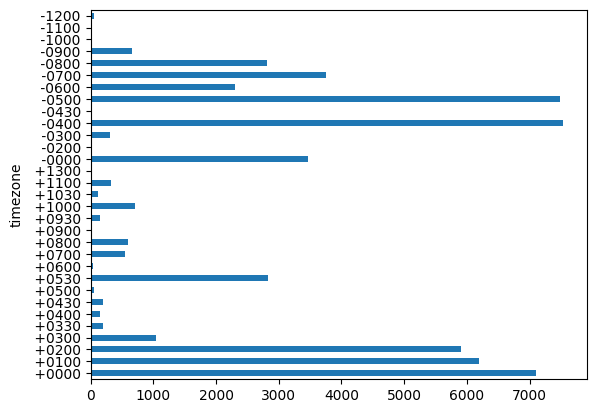

In [178]:
finish.groupby(['timezone'])['account'].count().plot.barh()

In [180]:
finish.groupby(['timezone'])['account'].count().sort_values(ascending=False)[0:10]

timezone
 -0400    7529
 -0500    7482
 +0000    7108
 +0100    6199
 +0200    5901
 -0700    3756
 -0000    3463
 +0530    2828
 -0800    2815
 -0600    2310
Name: account, dtype: int64

In [169]:
finish.reset_index().to_feather('cleaning.feather')

In [170]:
finish=pd.read_feather('cleaning.feather')

In [172]:
finish['references_url']

0                                                     None
1                                                     None
2        https://www.freelists.org/post/program-l/test,...
3                                                     None
4        https://www.freelists.org/post/program-l/Creat...
                               ...                        
55485                                                 None
55486    https://www.freelists.org/post/program-l/Reque...
55487    https://www.freelists.org/post/program-l/Reque...
55488    https://www.freelists.org/post/program-l/Reque...
55489    https://www.freelists.org/post/program-l/Reque...
Name: references_url, Length: 55490, dtype: object